# Ironhack Delivery project

## Ejercicio #4: Análisis Exploratorio de Datos (Ejercicio de Programación Estadística)

In [2]:
import numpy as np
import pandas as pd

In [3]:
headers = [
    'order_id', 'activation_time_local', 'country_code', 'store_address', 'final_status', 'payment_status', 'products', 'products_total', 'purchase_total_price'
]

dataold = pd.read_csv('./project_dataset/python_raw_data/fake_orders_test.csv', header=None, names=headers)
dataold.to_csv('./project_dataset/python_raw_data/fake_orders_test_headers.csv', index=False)

In [4]:
data = pd.read_csv('./project_dataset/python_raw_data/fake_orders_test_headers.csv')
data.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
1,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
2,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
4,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60400 entries, 0 to 60399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               60400 non-null  int64  
 1   activation_time_local  60400 non-null  object 
 2   country_code           60400 non-null  object 
 3   store_address          60400 non-null  int64  
 4   final_status           60400 non-null  object 
 5   payment_status         60400 non-null  object 
 6   products               60400 non-null  int64  
 7   products_total         60400 non-null  float64
 8   purchase_total_price   60400 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.1+ MB


In [6]:
data.describe()

,order_id,store_address,products,products_total,purchase_total_price
count,6.040000e+04,60400.000000,60400.000000,60400.000000,60400.000000
mean,3.278265e+07,41580.723692,2.811358,9.832693,10.703447
std,4.453627e+05,21905.784563,2.431214,9.276841,10.781632
min,3.150378e+07,190.000000,1.000000,0.000000,0.000000
25%,3.240091e+07,21110.000000,1.000000,4.110000,4.330000
50%,3.278110e+07,45849.000000,2.000000,7.120000,7.980000
75%,3.318279e+07,61992.250000,3.000000,12.750000,14.160000
max,3.356085e+07,75236.000000,39.000000,221.480000,265.760000


In [7]:
# Ojo!!! Que hay pedidos con status CANCELADO pero que se han recogido (i.e. tienen un importe !=0 en purchase_total_price)!
# Supuesto: A falta de información, consideramos todos los pedidos de la tabla como válidos, independientemente de su final_status
data[(data['final_status']=='CanceledStatus') & (data['purchase_total_price']>0)] # 508 filas

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
62,33556246,2019-03-10 23:29:05.000000,AR,62526,CanceledStatus,PAID,1,4.75,84.00
124,33525918,2019-03-10 23:11:28.000000,ES,54564,CanceledStatus,PAID,6,32.95,34.35
225,33553070,2019-03-10 22:50:09.000000,AR,58206,CanceledStatus,PAID,1,2.59,3.78
285,33551748,2019-03-10 22:37:49.000000,AR,57884,CanceledStatus,NOT_PAID,2,7.99,7.99
428,33549012,2019-03-10 22:13:40.000000,AR,50171,CanceledStatus,PAID,2,3.02,3.02
...,...,...,...,...,...,...,...,...,...
59664,32010321,2019-03-01 11:31:21.000000,RO,72971,CanceledStatus,PAID,1,2.74,2.74
59774,32012126,2019-03-01 11:11:05.000000,ES,234,CanceledStatus,PAID,1,3.30,3.90
59810,32006409,2019-03-01 11:03:03.000000,UA,50834,CanceledStatus,PAID,3,13.07,13.07
60262,31876071,2019-03-01 09:03:08.000000,ES,16217,CanceledStatus,PAID,8,12.87,12.69


In [8]:
data['payment_status'].value_counts()
data[(data['payment_status'].isin(['NOT_PAID','DELAYED'])) & (data['purchase_total_price']>0)] # 504 filas

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
285,33551748,2019-03-10 22:37:49.000000,AR,57884,CanceledStatus,NOT_PAID,2,7.99,7.99
386,33549754,2019-03-10 22:19:57.000000,AR,62842,DeliveredStatus,NOT_PAID,2,11.84,12.40
482,33514699,2019-03-10 22:07:04.000000,ES,5257,DeliveredStatus,NOT_PAID,1,14.25,14.95
541,33471578,2019-03-10 21:59:47.000000,TR,62031,DeliveredStatus,NOT_PAID,2,3.35,4.46
568,33512072,2019-03-10 21:56:30.000000,MA,74889,CanceledStatus,NOT_PAID,1,6.00,6.00
...,...,...,...,...,...,...,...,...,...
59824,32052359,2019-03-01 11:00:23.000000,EC,51363,DeliveredStatus,NOT_PAID,2,8.99,16.36
60051,32044836,2019-03-01 10:05:17.000000,EC,31866,DeliveredStatus,NOT_PAID,1,3.96,5.72
60104,32009112,2019-03-01 10:01:40.000000,FR,3160,DeliveredStatus,NOT_PAID,2,6.80,7.40
60394,32002340,2019-03-01 00:09:21.000000,AR,14455,DeliveredStatus,NOT_PAID,2,5.14,5.14


In [9]:
data.shape

(60400, 9)

In [10]:
# 1. ¿Qué porcentaje de pedidos están subautorizados?
data['subautorizado'] = data['products_total'] < data['purchase_total_price']
porcentaje_subautorizado = data['subautorizado'].mean() * 100
print(f'Porcentaje (%) de pedidos subautorizados: {porcentaje_subautorizado:.2f}%')

Porcentaje (%) de pedidos subautorizados: 57.58%


In [11]:
# 2. ¿Qué porcentaje de pedidos se autorizarían correctamente con una autorización incremental (+20%) sobre el monto en el checkout?
#data['autorizacion_ok_con_20_pct'] = (data['products_total']+data['products_total']*0.2) >= data['purchase_total_price']
data['autorizacion_ok_con_20_pct'] = (data['products_total']*1.2) >= data['purchase_total_price']
porcentaje_ok_con_20pct = data['autorizacion_ok_con_20_pct'].mean() * 100
print(f'Porcentaje (%) de pedidos autorizados añadiendo un 20% en el checkout: {porcentaje_ok_con_20pct:.2f}%\n')
num_subautorizados_antes = len(data[data['subautorizado']])
num_subautorizados_ahora = len(data[~data['autorizacion_ok_con_20_pct']])
print('Subautorizados antes: ', num_subautorizados_antes)
print('Subautorizados ahora: ', num_subautorizados_ahora)
print('Total pedidos: ', len(data))
print(f'Por tanto, reduciríamos el % de subautorizados al: {(1-data['autorizacion_ok_con_20_pct'].mean())*100:.2f}%')
print(f'Es decir, reduciríamos los subautorizados en un: {(num_subautorizados_ahora/num_subautorizados_antes)*100:.2f}%')

Porcentaje (%) de pedidos autorizados añadiendo un 20% en el checkout: 69.03%

Subautorizados antes:  34781
Subautorizados ahora:  18703
Total pedidos:  60400
Por tanto, reduciríamos el % de subautorizados al: 30.97%
Es decir, reduciríamos los subautorizados en un: 53.77%


In [12]:
# 3. ¿Hay diferencias cuando se dividen por país?
# NOTA: Entiendo que esta pregunta se refiere únicamente a la anterior
gd_autorizados20 = data.groupby(by='country_code').agg({'autorizacion_ok_con_20_pct':'mean'}).apply(lambda row: round(row*100,2), axis=1)
gd_autorizados20.sort_values(by='autorizacion_ok_con_20_pct', ascending=False)

,autorizacion_ok_con_20_pct
country_code,
PR,87.88
CR,79.86
GT,79.72
UY,79.47
PE,78.10
MA,77.51
KE,73.40
UA,72.66
RO,72.17


In [13]:
data[(data['subautorizado']) & (~data['autorizacion_ok_con_20_pct']) & (data['products_total']==0)]

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,subautorizado,autorizacion_ok_con_20_pct
21931,33017821,2019-03-07 20:05:09.000000,AR,16568,DeliveredStatus,PAID,2,0.0,9.12,True,False
31516,32759269,2019-03-05 21:02:05.000000,AR,16568,DeliveredStatus,PAID,2,0.0,9.98,True,False


In [14]:
# 4. Para el resto de pedidos que quedarían fuera de la autorización incremental, ¿qué valores serían necesarios para capturar el monto restante?
def calcular_monto_extra(r):    
    ret =0
    if (r['subautorizado'] and not r['autorizacion_ok_con_20_pct']):
        if (r['products_total']==0):
            # nb. Hay 2 filas con 0 en 'products_total'; nos da problemas para hacer la división; decidimos asignarle 1000%
            ret = 10.00 * 100
        else:
            ret = round(((r['purchase_total_price'] / r['products_total']) - 1) * 100, 2)
    return ret
data['pct_monto_extra'] = data.apply(lambda row: calcular_monto_extra(row), axis=1)
#data[~data['autorizacion_ok_con_20_pct']].sort_values(by='pct_monto_extra', ascending=False).loc[:,['autorizacion_ok_con_20_pct','products_total','purchase_total_price','pct_monto_extra']]
data[~data['autorizacion_ok_con_20_pct']].loc[:,['autorizacion_ok_con_20_pct','products_total','purchase_total_price','pct_monto_extra']]

,autorizacion_ok_con_20_pct,products_total,purchase_total_price,pct_monto_extra
0,False,4.54,8.64,90.31
4,False,2.86,6.48,126.57
10,False,2.05,10.17,396.10
12,False,8.10,10.20,25.93
20,False,4.42,5.73,29.64
...,...,...,...,...
60371,False,9.83,21.44,118.11
60373,False,3.28,6.56,100.00
60374,False,2.46,5.25,113.41
60380,False,3.44,6.89,100.29


In [15]:
# Comprobar el valor de 1000% que hemos asignado en las 2 filas raras
data[(data['products_total']==0) & (data['pct_monto_extra']==1000)]

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,subautorizado,autorizacion_ok_con_20_pct,pct_monto_extra
21931,33017821,2019-03-07 20:05:09.000000,AR,16568,DeliveredStatus,PAID,2,0.0,9.12,True,False,1000.0
31516,32759269,2019-03-05 21:02:05.000000,AR,16568,DeliveredStatus,PAID,2,0.0,9.98,True,False,1000.0


In [16]:
# 5. ¿Qué tiendas son las más problemáticas en términos de pedidos y valor monetario?
subset = ['store_address','final_status','payment_status','products_total','purchase_total_price','subautorizado']
data[subset]
tiendas_problemáticas = data[data['subautorizado']].groupby('store_address').agg(
    num_pedidos_problematicos=('order_id', 'count'),
    suma_products_total=('products_total', 'sum'),
    suma_purchase_total_price=('purchase_total_price', 'sum')
).reset_index()
tiendas_problemáticas['valor_monetario'] = tiendas_problemáticas['suma_purchase_total_price'] - tiendas_problemáticas['suma_products_total']
tiendas_problemáticas.sort_values(by='num_pedidos_problematicos', ascending=False).loc[:,['store_address','num_pedidos_problematicos','valor_monetario']]

,store_address,num_pedidos_problematicos,valor_monetario
1154,28671,448,775.80
1159,28712,217,410.22
1143,28286,204,98.68
659,14455,179,791.41
558,11694,160,279.18
...,...,...,...
2251,50843,1,2.01
2252,50850,1,0.08
3580,65912,1,12.78
2257,50992,1,0.01


In [72]:
# 6. Para los pedidos subautorizados, ¿hay una correlación entre la diferencia en los precios y la cancelación del pedido? 
# En otras palabras: ¿Es más probable que se cancele un pedido a medida que aumenta la diferencia de precio?
data['diferencia_precios'] = data['purchase_total_price'] - data['products_total']
data['final_status_numeric'] = data['final_status'].transform(lambda x: 1 if x=='CanceledStatus' else 0)
data_cancelados_precios = data[data['subautorizado']].loc[:, ['final_status', 'final_status_numeric', 'diferencia_precios']]
corr = data_cancelados_precios.select_dtypes(np.number).corr()
display(corr)
print('Realmente no hay una gran correlación entre la diferencia de precios y final_status: ', corr.iloc[0,1])
print(f'De hecho, comprobamos que el número de pedidos subautorizados con final_status igual a \'CanceledStatus\' son sólo {len(data[(data['subautorizado']) & (data['final_status']=='CanceledStatus')])} de un total de {len(data[data['subautorizado']])} pedidos subautorizados.')
print('Además, tal y como se muestra en el scatter plot más abajo, la mayoría están en el rango bajo de diferencia entre products_total y purchase_total_price.')

,final_status_numeric,diferencia_precios
final_status_numeric,1.000000,0.123721
diferencia_precios,0.123721,1.000000


Realmente no hay una gran correlación entre la diferencia de precios y final_status:  0.12372105249553894
De hecho, comprobamos que el número de pedidos subautorizados con final_status igual a 'CanceledStatus' son sólo 338 de un total de 34781 pedidos subautorizados.
Además, tal y como se muestra en el scatter plot más abajo, la mayoría están en el rango bajo de diferencia entre products_total y purchase_total_price.


In [73]:
import matplotlib.pyplot as plt

#Configuramos para que las gráficas se vean dentro del cuaderno
%matplotlib inline
# Establecemos el tamaño de la fuente en los gráficos
plt.rc('font', size=8)
# Ajustamos el tamaño de las figuras
plt.rc('figure', figsize=(20, 6))

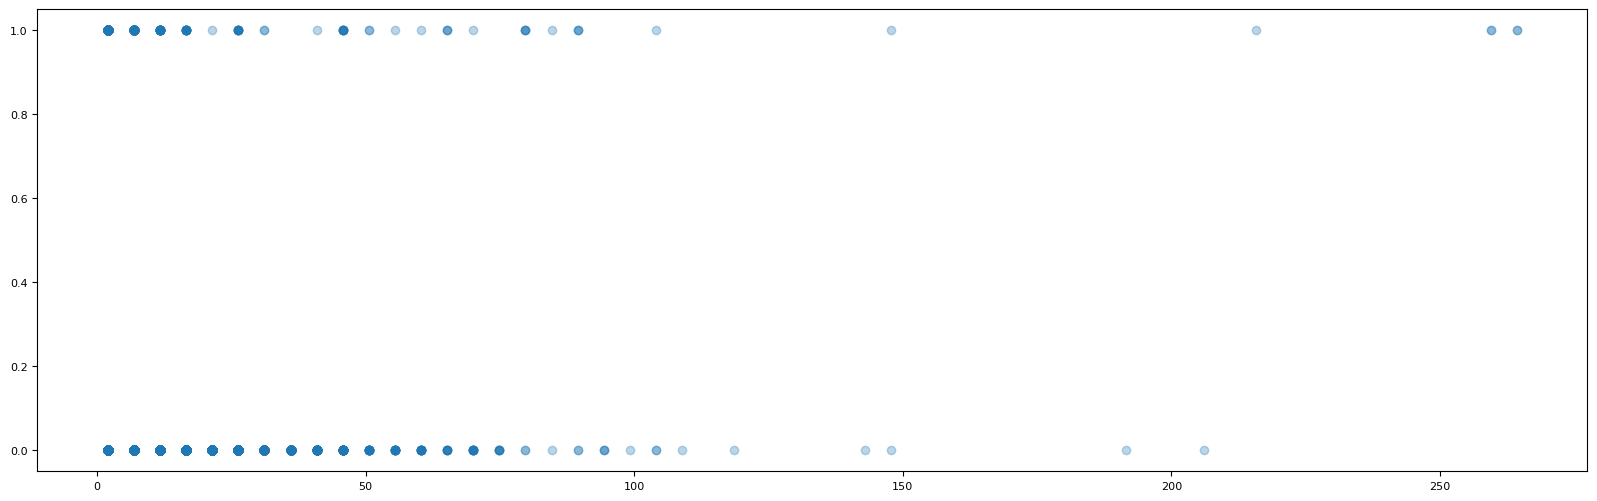

In [74]:
bins = []
for n in range(100):
    bins.append('bin#'+f'{n:03}')
data['diff_bin_range'] = pd.cut(data['diferencia_precios'], 100) #.astype(str)
data['diff_bin_name'] = pd.cut(data['diferencia_precios'], 100, duplicates='drop', labels=bins, ordered=True)
data['x'] = pd.IntervalIndex(data['diff_bin_range']).right
data[['diferencia_precios','final_status','final_status_numeric','diff_bin_range','diff_bin_name','x']].sample(50)
data_for_plot = data[data['subautorizado']].sort_values(by='diferencia_precios')
#plt.scatter(x=data_for_plot.iloc[:20]['x'], y=data_for_plot.iloc[:20]['final_status_numeric'])
#plt.scatter(x=data_for_plot['diff_bin_name'], y=data_for_plot['final_status_numeric'])
plt.scatter(x=data_for_plot['x'], y=data_for_plot['final_status_numeric'], alpha=0.3)

